<a href="https://colab.research.google.com/github/AnshT013/Machine_Learning_initial_Practice/blob/main/IrisClassificationWithMultipleModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing essential libraries
import pandas as pd  # For data handling and manipulation
import numpy as np   # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs

# Load Iris dataset directly from seaborn (already cleaned and labeled)
iris = sns.load_dataset('iris')

# Show first 5 rows
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000   

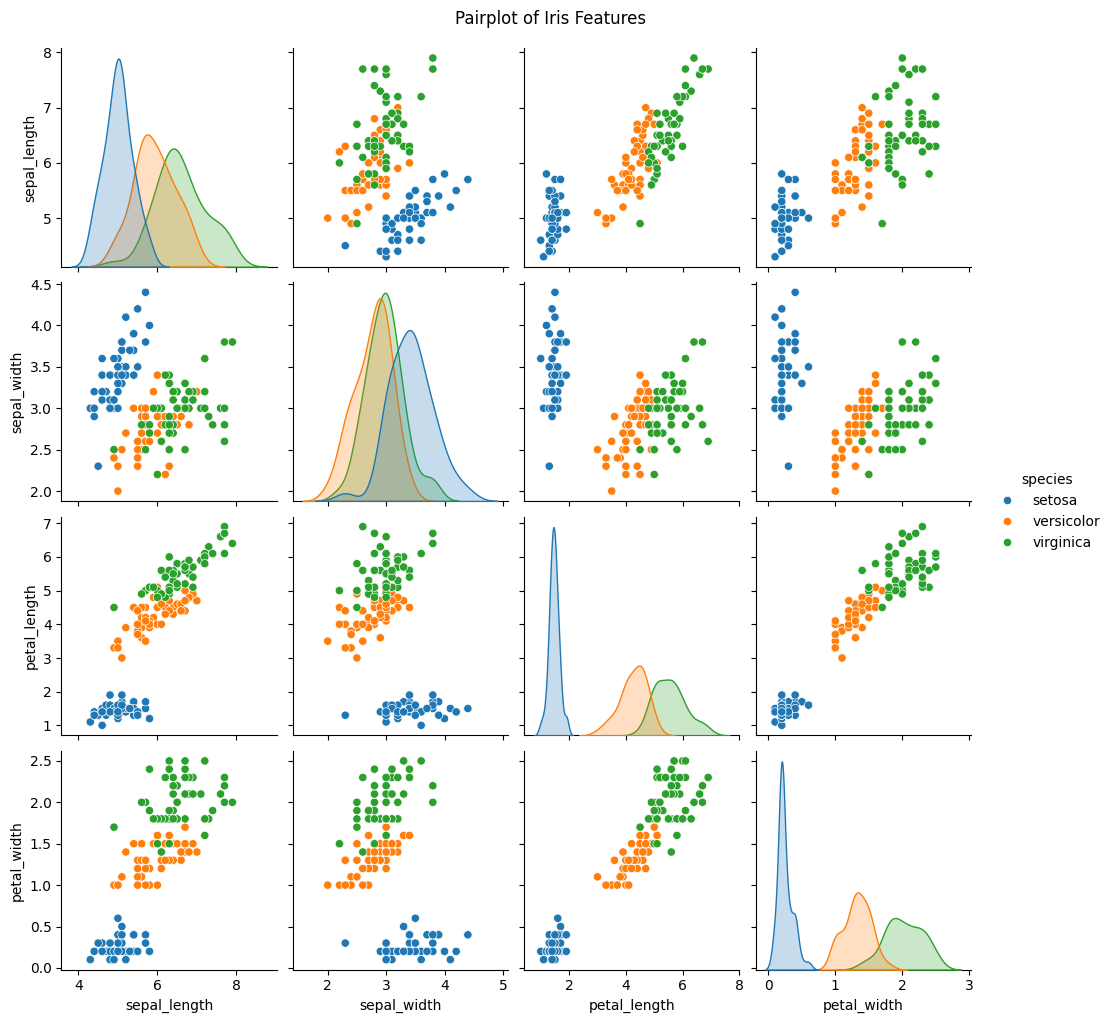

ValueError: could not convert string to float: 'setosa'

<Figure size 800x600 with 0 Axes>

In [3]:
# Check for missing values
print("Missing values:\n", iris.isnull().sum())

# Basic info about dataset
print("\nDataset Info:")
print(iris.info())

# Statistical summary
print("\nSummary Statistics:")
print(iris.describe())

# Visualize pairwise relationships
sns.pairplot(iris, hue='species')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(iris.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


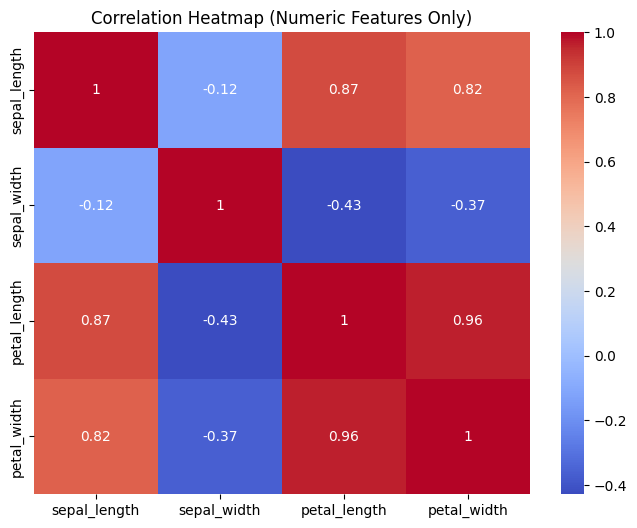

In [4]:
# Correlation heatmap (use only numeric features)
plt.figure(figsize=(8,6))
sns.heatmap(iris.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# Separate features (X) and labels (y)
X = iris.drop('species', axis=1)  # All columns except target
y = iris['species']               # Target column (label)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of datasets
print("Training Features Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (120, 4)
Training Labels Shape: (120,)
Testing Features Shape: (30, 4)
Testing Labels Shape: (30,)


In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=200)
# Fit (train) the model using training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

✅ Accuracy Score: 1.0

📄 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



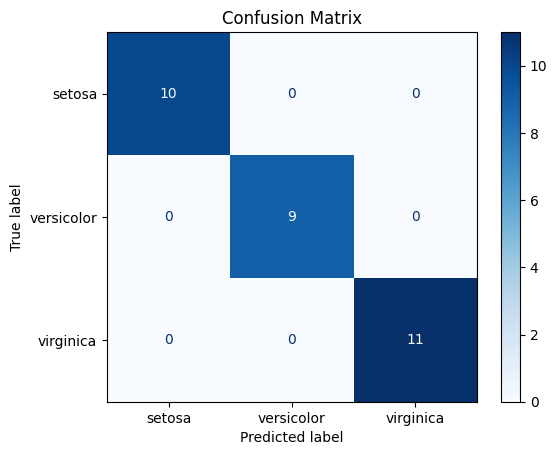

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy Score:", acc)

# Classification report
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [8]:
# Define a custom input (sepal length, sepal width, petal length, petal width)
# Example: [5.1, 3.5, 1.4, 0.2] — should predict Setosa

sample_input = [[5.1, 3.5, 1.4, 0.2]]
prediction = model.predict(sample_input)

print("🌸 Predicted Species:", prediction[0])


🌸 Predicted Species: setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
